In [4]:
import numpy as np
import pandas as pd
import sklearn                       #for ML models
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression   

In [5]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 9865-CB66

 Directory of C:\Users\sumit\Documents\Excelr

25-11-2025  16:32    <DIR>          .
16-11-2025  19:55    <DIR>          ..
24-11-2025  18:39    <DIR>          .ipynb_checkpoints
23-11-2025  19:55    <DIR>          Assignment
21-10-2025  19:20           103,983 BEML.csv
08-11-2025  20:45            87,155 beml_df.csv
08-11-2025  21:10             8,784 Confidence Interval.ipynb
22-11-2025  17:39             5,311 data_clean.csv
23-11-2025  11:12           468,734 EDA_1_latest.ipynb
21-10-2025  19:20           107,633 GLAXO.csv
08-11-2025  20:46            88,939 glaxo_df.csv
20-11-2025  17:16            13,379 Hypothesis Test.ipynb
15-10-2025  12:29            17,765 Introduction to python.ipynb
15-10-2025  12:28             1,336 mtcars.csv
24-11-2025  18:31            64,955 news_paper.ipynb
24-11-2025  18:29             1,240 NewspaperData.csv
22-10-2025  12:07           239,760 Normal Disribution.ipynb
20-10-2025  15

(109, 2)  shape of data
   Waist     AT
0  74.75  25.72
1  72.60  25.89
2  81.80  42.60
3  83.95  42.80
4  74.65  29.84


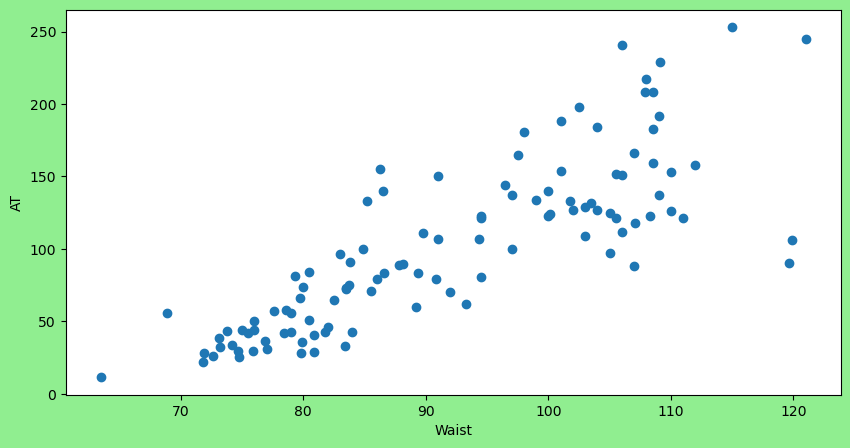

In [6]:
wcat = pd.read_csv('WC_AT.csv')
print(wcat.shape,' shape of data')
print(wcat.head(5))

#finding relation between waist & AT: scatter plot
plt.figure(figsize=(10,5), facecolor='lightgreen')
plt.scatter(wcat.Waist, wcat.AT)
plt.xlabel('Waist')
plt.ylabel('AT')
plt.show()

In [11]:
wcat.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


# Creating model with `Sklearn`

In [27]:
lm = LinearRegression()

x = wcat.Waist.values.reshape(109,1)     #convert x in matrix format
y = wcat.AT.values.reshape(109,1)        #convert y in matrix format
print(y)
reg_sklearn = lm.fit(x,y)                #expects data in matrix format

[[ 25.72]
 [ 25.89]
 [ 42.6 ]
 [ 42.8 ]
 [ 29.84]
 [ 21.68]
 [ 29.08]
 [ 32.98]
 [ 11.44]
 [ 32.22]
 [ 28.32]
 [ 43.86]
 [ 38.21]
 [ 42.48]
 [ 30.96]
 [ 55.78]
 [ 43.78]
 [ 33.41]
 [ 43.35]
 [ 29.31]
 [ 36.6 ]
 [ 40.25]
 [ 35.43]
 [ 60.09]
 [ 45.84]
 [ 70.4 ]
 [ 83.45]
 [ 84.3 ]
 [ 78.89]
 [ 64.75]
 [ 72.56]
 [ 89.31]
 [ 78.94]
 [ 83.55]
 [127.  ]
 [121.  ]
 [107.  ]
 [129.  ]
 [ 74.02]
 [ 55.48]
 [ 73.13]
 [ 50.5 ]
 [ 50.88]
 [140.  ]
 [ 96.54]
 [118.  ]
 [107.  ]
 [123.  ]
 [ 65.92]
 [ 81.29]
 [111.  ]
 [ 90.73]
 [133.  ]
 [ 41.9 ]
 [ 41.71]
 [ 58.16]
 [ 88.85]
 [155.  ]
 [ 70.77]
 [ 75.08]
 [ 57.05]
 [ 99.73]
 [ 27.96]
 [123.  ]
 [ 90.41]
 [106.  ]
 [144.  ]
 [121.  ]
 [ 97.13]
 [166.  ]
 [ 87.99]
 [154.  ]
 [100.  ]
 [123.  ]
 [217.  ]
 [140.  ]
 [109.  ]
 [127.  ]
 [112.  ]
 [192.  ]
 [132.  ]
 [126.  ]
 [153.  ]
 [158.  ]
 [183.  ]
 [184.  ]
 [121.  ]
 [159.  ]
 [245.  ]
 [137.  ]
 [165.  ]
 [152.  ]
 [181.  ]
 [ 80.95]
 [137.  ]
 [125.  ]
 [241.  ]
 [134.  ]
 [150.  ]
 [198.  ]


In [23]:
print(reg_sklearn.coef_)        #alpha
print(reg_sklearn.intercept_)   #beta

[[3.45885939]]
[-215.98148796]


In [29]:
y_predict = reg_sklearn.predict(x)     #predicted value of x

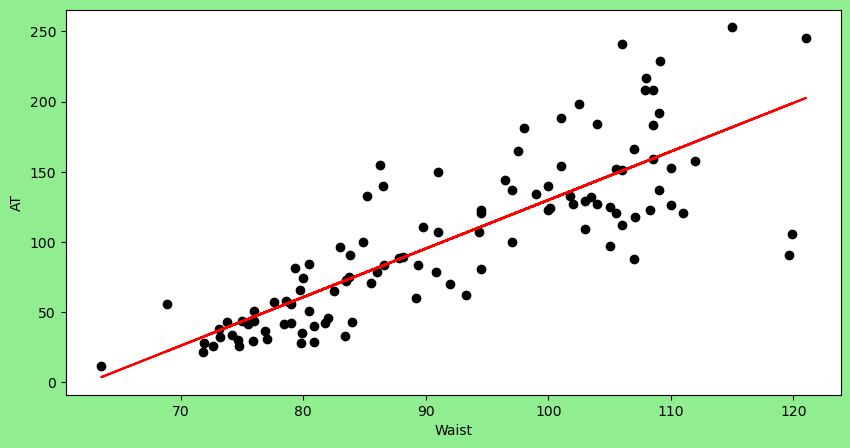

In [30]:
#ploting a model
plt.figure(figsize=(10,5), facecolor = 'lightgreen')

plt.scatter(wcat.Waist, wcat.AT, color = 'black')    #actual values
plt.plot(wcat.Waist, y_predict, color = 'red')       #predicted line

plt.xlabel('Waist')
plt.ylabel('AT')
plt.show()

# Model validation
`r2_score`

In [36]:
from sklearn.metrics import r2_score
r2_score(y, y_predict)

0.6700368930528429

# Create model with `statsmodels`

In [7]:
import statsmodels.formula.api as smf

In [11]:
first_model = smf.ols('AT~Waist', data = wcat).fit()    #y_variable ~ x_variable

In [12]:
first_model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [16]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           1.62e-27
Time:                        16:39:32   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Try to improve the model by:__</br>
`y=alpha*x + beta` </br>
`y=alpha*log(x) + beta`</br>
`log(y)=alpha*x + beta`</br>
`log(y)=alpha1*x**2 + alpha2*x + beta` or `y=alpha1*x**2 + alpha2*x + beta`</br></br>

to increase __`r_squared`__

In [24]:
first_model2 = smf.ols('AT~np.log(Waist)', data = wcat).fit()

In [25]:
first_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           6.80e-28
Time:                        16:55:16   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
first_model3 = smf.ols('np.log(AT)~Waist', data = wcat).fit()

In [27]:
first_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           2.68e-30
Time:                        16:55:32   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
wcat['waist_sq'] = wcat.Waist**2
first_model4 = smf.ols('np.log(AT)~Waist+waist_sq', data = wcat).fit()

In [29]:
first_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           1.80e-35
Time:                        17:00:31   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist          0.2289      0.032      7.107      0.000       0.165       0.293
waist_sq      -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""